# NLP - 1st Assignment Part A
# Aris Tsilifonis mtn2323

# A. Tokens, Types, Zipf's law

In this assignment, nltk's word tokenize, BertTokenizer from HuggingFace framework( bert base cased version) and SpaCy's en_core_web_sm were implemented. News texts from wall street journal dataset were tested. For each method,  the total number of tokens, the number of types, the type-token-ratio(TTR) as well as hapax legomena/dislegomena is presented. Then, a random sentence from the dataset is tokenized independently to understand the differences between each tokenization method. Furthermore, types are ranked for each tokenization method based on how many times they occured in the text. The 30% most frequent types are extracted for each method to test how many of them are common. A diagram showing the actual and the predicted values of zipf's law is created. Also, we tested several values of A constant to find the one that fits the probability distribution of each tokenization method better. Finally, chat gpt prompts were used to recreate those diagrams.



In [2]:
import nltk
nltk.download('punkt')
!pip install spacy
!python -m spacy download en_core_web_sm
!pip install transformers
# For data manipulation and analysis
import pandas as pd
import spacy
import transformers
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 43.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/My Drive/NLP-IIT/wsj_untokenized.txt")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Columns: 5027 entries,  Pierre Vinken to  but that it would be a ''reckless course of action'' for President Bush to claim the authority without congressional approval. Trinity Industries Inc. said it reached a preliminary agreement to sell 500 railcar platforms to Trailer Train Co. of Chicago. Terms weren't disclosed.
dtypes: object(5027)
memory usage: 124.0+ bytes


In [5]:
df.head()

Empty DataFrame
Columns: [ Pierre Vinken,  61 years old,  will join the board as a nonexecutive director Nov. 29. Mr. Vinken is chairman of Elsevier N.V.,  the Dutch publishing group. Rudolph Agnew,  55 years old and former chairman of Consolidated Gold Fields PLC,  was named a nonexecutive director of this British industrial conglomerate. A form of asbestos once used to make Kent cigarette filters has caused a high percentage of cancer deaths among a group of workers exposed to it more than 30 years ago,  researchers reported. The asbestos fiber,  crocidolite,  is unusually resilient once it enters the lungs,  with even brief exposures to it causing symptoms that show up decades later,  researchers said. Lorillard Inc.,  the unit of New York-based Loews Corp. that makes Kent cigarettes,  stopped using crocidolite in its Micronite cigarette filters in 1956. Although preliminary findings were reported more than a year ago,  the latest results appear in today's New England Journal of Medicine,  a forum likely to bring new attention to the problem. A Lorillard spokewoman said,  ''This is an old story. We're talking about years ago before anyone heard of asbestos having any questionable properties. There is no asbestos in our products now.'' Neither Lorillard nor the researchers who studied the workers were aware of any research on smokers of the Kent cigarettes. ''We have no useful information on whether users are at risk, '' said James A. Talcott of Boston's Dana-Farber Cancer Institute. Dr. Talcott led a team of researchers from the National Cancer Institute and the medical schools of Harvard University and Boston University. The Lorillard spokeswoman said asbestos was used in ''very modest amounts'' in making paper for the filters in the early 1950s and replaced with a different type of filter in 1956. From 1953 to 1955,  9.8 billion Kent cigarettes with the filters were sold,  the company said. Among 33 men who worked closely with the substance,  28 have died -- more than three times the expected number. Four of the five surviving workers have asbestos-related diseases,  including three with recently diagnosed cancer. The total of 18 deaths from malignant mesothelioma,  lung cancer and asbestosis was far higher than expected,  the researchers said. ''The morbidity rate is a striking finding among those of us who study asbestos-related diseases, '' said Dr. Talcott. The percentage of lung cancer deaths among the workers at the West Groton,  Mass.,  paper factory appears to be the highest for any asbestos workers studied in Western industrialized countries,  he said. The plant,  which is owned by Hollingsworth & Vose Co.,  was under contract with Lorillard to make the cigarette filters. The finding probably will support those who argue that the U.S. should regulate the class of asbestos including crocidolite more stringently than the common kind of asbestos,  chrysotile,  found in most schools and other buildings,  Dr. Talcott said. The U.S. is one of the few industrialized nations that doesn't have a higher standard of regulation for the smooth,  needle-like fibers such as crocidolite that are classified as amphobiles,  according to Brooke T. Mossman,  a professor of pathlogy at the University of Vermont College of Medicine. More common chrysotile fibers are curly and are more easily rejected by the body,  Dr. Mossman explained. In July,  the Environmental Protection Agency imposed a gradual ban on virtually all uses of asbestos. By 1997,  almost all remaining uses of cancer-causing asbestos will be outlawed. About 160 workers at a factory that made paper for the Kent filters were exposed to asbestos in the 1950s. Areas of the factory were particularly dusty where the crocidolite was used. Workers dumped large burlap sacks of the imported material into a huge bin,  poured in cotton and acetate fibers and mechanically mixed the dry fibers in a process used to make filters. Workers described ''clouds of blue dust'' that hung ove

In [6]:
from __future__ import print_function
from nltk.tokenize import word_tokenize

# Initialize a Counter object to count tokens
token_counts = Counter()
# Total token counter
total_tokens = 0

with open ("/content/drive/My Drive/NLP-IIT/wsj_untokenized.txt") as fin, open('tokens.txt','w') as fout:
    for line in fin:
        tokens = word_tokenize(line)
        print(' '.join(tokens), end='\n', file=fout)

        # Update total tokens count
        total_tokens += len(tokens)

        # Update counts for each token
        token_counts.update(tokens)


# Now token_counts contains all tokens with their frequencies,
# and total_tokens is the total number of tokens processed.

# Number of unique tokens (types) can be found by getting the length of token_counts
unique_tokens = len(token_counts)

print(f"Total Tokens: {total_tokens}")
print(f"Unique Tokens (Types): {unique_tokens}")

# Calculate Type-Token Ratio (TTR)
TTR = unique_tokens / total_tokens if total_tokens > 0 else 0

print(f"Type-Token Ratio (TTR): {TTR:.4f}")

# Calculate hapax legomena and dislegomena
hapax_legomena = sum(1 for count in token_counts.values() if count == 1)
hapax_dislegomena = sum(1 for count in token_counts.values() if count == 2)

print(f"Hapax Legomena (appears only once): {hapax_legomena}")
print(f"Hapax Dislegomena (appears exactly twice): {hapax_dislegomena}")

Total Tokens: 93530
Unique Tokens (Types): 12000
Type-Token Ratio (TTR): 0.1283
Hapax Legomena (appears only once): 6254
Hapax Dislegomena (appears exactly twice): 1830


In [7]:
from __future__ import print_function
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English

nlp = spacy.load("en_core_web_sm")  # Example: English model

# Initialize a Counter object to count tokens
token_counts2 = Counter()
# Total token counter
total_tokens2 = 0

# Open the input file and output file
with open("/content/drive/My Drive/NLP-IIT/wsj_untokenized.txt") as fin, open('tokens2.txt', 'w') as fout:
    for line in fin:
        # Tokenize the line
        doc = nlp(line)
        tokens = [token.text for token in doc]
        print(' '.join(tokens), file=fout)

        # Update total tokens count
        total_tokens2 += len(tokens)

        # Update counts for each token
        token_counts2.update(tokens)

# Now token_counts2 contains all tokens with their frequencies,
# and total_tokens2 is the total number of tokens processed.

# Number of unique tokens (types) can be found by getting the length of token_counts2
unique_tokens = len(token_counts2)

print(f"Total Tokens: {total_tokens2}")
print(f"Unique Tokens (Types): {unique_tokens}")

# Calculate Type-Token Ratio (TTR)
TTR = unique_tokens / total_tokens2 if total_tokens2 > 0 else 0

print(f"Type-Token Ratio (TTR): {TTR:.4f}")

# Calculate hapax legomena and dislegomena
hapax_legomena = sum(1 for count in token_counts2.values() if count == 1)
hapax_dislegomena = sum(1 for count in token_counts2.values() if count == 2)

print(f"Hapax Legomena (appears only once): {hapax_legomena}")
print(f"Hapax Dislegomena (appears exactly twice): {hapax_dislegomena}")

Total Tokens: 95894
Unique Tokens (Types): 11477
Type-Token Ratio (TTR): 0.1197
Hapax Legomena (appears only once): 5746
Hapax Dislegomena (appears exactly twice): 1790


In [8]:
from transformers import BertTokenizer
# Load the BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

# Initialize a Counter object to count tokens
token_counts3 = Counter()
# Total token counter
total_tokens3 = 0


# Open the input file and output file
with open("/content/drive/My Drive/NLP-IIT/wsj_untokenized.txt") as fin, open('tokens3.txt', 'w') as fout:
    for line in fin:
        # Tokenize the line and get the token strings
        tokens = tokenizer.tokenize(line)
        # Write the tokens to the output file, joined by spaces
        fout.write(' '.join(tokens) + '\n')

        # Update total tokens count
        total_tokens3 += len(tokens)

        # Update counts for each token
        token_counts3.update(tokens)


# Now token_counts3 contains all tokens with their frequencies,
# and total_tokens3 is the total number of tokens processed.

# Number of unique tokens (types) can be found by getting the length of token_counts3
unique_tokens = len(token_counts3)

print(f"Total Tokens: {total_tokens3}")
print(f"Unique Tokens (Types): {unique_tokens}")

# Calculate Type-Token Ratio (TTR)
TTR = unique_tokens / total_tokens3 if total_tokens3 > 0 else 0

print(f"Type-Token Ratio (TTR): {TTR:.4f}")

# Calculate hapax legomena and dislegomena
hapax_legomena = sum(1 for count in token_counts3.values() if count == 1)
hapax_dislegomena = sum(1 for count in token_counts3.values() if count == 2)

print(f"Hapax Legomena (appears only once): {hapax_legomena}")
print(f"Hapax Dislegomena (appears exactly twice): {hapax_dislegomena}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Total Tokens: 112325
Unique Tokens (Types): 10266
Type-Token Ratio (TTR): 0.0914
Hapax Legomena (appears only once): 3851
Hapax Dislegomena (appears exactly twice): 1724


# Comparison of NLTK, SpaCy and BERT Tokenization method

## Vocabulary size

The largest vocabulary is created by NLTK method, which contains (12.000) unique tokens. It produced a larger variety of different tokens compared to the other methods, since SpaCy had (11.477) unique tokens and BERT (10.266). This could imply that even though BERT had the highest number of total tokens, these tokens might be repeated or being very similar.

## Type-Token-Ratio(TTR)
The lexical diversity of a text can be extracted by type-token-ratio. Higher TTR can be interpretated as higher diversity.  NLTK has the highest TTR (0.1283), suggesting it offers the highest lexical diversity among the three methods. SpaCy has a slightly lower TTR (0.1197). BERT has the lowest TTR (0.0914), which might be due to its low number of unique tokens despite the large number of total tokens, indicating less diversity.

## Hapax Legomena and Dislegomena

Zipf's law states that few words will be used frequently while the most will be used infrequently. How the words are distributed within a text can be understood by hapax legomena and dislegomena. NLTK reveals the largest count of hapax legomena (6254) and a considerable count of hapax dislegomena (1830), which is consistent with the zipf's law theorem, since most words occured only once or twice.  Conversely, SpaCy and BERT register lower instances of both hapax legomena and dislegomena, with BERT recording the fewest. This trend could indicate a narrower variety of rare used words. Also, specific words and expressions might be used more frequently in these tokenization methods.

## Summary

NLTK method finds the bigger list of different words. The results indicate that the highest lexical diversity occurs in NLTK due to its largest number of hapax legomena and dislegomena as well as TTR compared to the other methods. NLTK can be the best option for tokenizing text since it created the richest vocabulary. BERT does not have as much variety since it cannot capture as many unique words. Its strength lies in tokenizing quite larger dataset which can be proved more demanding. It can understand the subtle meanings of the languange, so it might be more suitabe for sentiment analysis. Regarding SpaCy, it has good overall performance and it can create a satisfying amount of unique words but it does not perform optimally.



In [9]:
print(token_counts)

Counter({',': 4823, 'the': 4041, '.': 3819, 'of': 2312, 'to': 2157, 'a': 1857, 'in': 1563, 'and': 1489, "''": 959, "'s": 863, 'for': 815, 'that': 807, 'The': 714, '$': 708, 'is': 671, 'said': 627, 'on': 489, 'it': 475, '%': 446, 'by': 427, '``': 425, 'at': 401, 'with': 386, 'from': 385, 'as': 383, 'million': 383, 'Mr.': 371, 'are': 369, 'was': 367, 'be': 355, 'has': 339, 'its': 332, "n't": 325, 'have': 323, 'an': 313, 'or': 290, 'will': 278, 'company': 260, 'he': 229, '--': 226, 'which': 225, 'year': 210, 'says': 210, 'they': 209, 'would': 209, 'about': 206, 'U.S.': 203, 'more': 198, 'were': 197, 'In': 197, 'this': 184, 'their': 181, 'than': 180, 'market': 176, 'had': 165, 'New': 164, 'who': 162, 'trading': 162, 'new': 161, ';': 160, 'billion': 158, 'But': 158, 'up': 153, 'but': 151, 'been': 150, 'also': 147, 'stock': 136, 'other': 134, 'president': 133, 'not': 133, 'one': 131, '&': 128, 'program': 127, ':': 125, 'Corp.': 123, 'some': 122, 'his': 121, 'could': 120, 'share': 119, 'becau

In [10]:
print(token_counts2)

Counter({',': 4823, 'the': 4047, '.': 3761, 'of': 2313, 'to': 2162, 'a': 1868, 'in': 1576, 'and': 1496, "''": 1372, '-': 1231, "'s": 863, 'for': 815, 'that': 807, 'The': 714, '$': 702, 'is': 671, 'said': 627, 'on': 491, 'it': 476, '%': 444, 'by': 428, 'at': 401, 'with': 386, 'from': 386, 'million': 385, 'as': 383, 'Mr.': 375, 'are': 369, 'was': 367, 'be': 357, 'has': 339, 'its': 332, "n't": 325, 'have': 323, 'an': 314, 'year': 291, 'or': 290, 'will': 278, 'company': 263, 'he': 229, '--': 225, 'which': 225, 'would': 210, 'says': 210, 'they': 209, 'U.S.': 208, 'about': 206, 'more': 200, 'were': 197, 'In': 197, 'market': 195, 'this': 184, 'than': 183, 'their': 181, 'trading': 176, 'stock': 173, 'one': 167, 'New': 166, 'had': 165, 'new': 164, 'up': 162, 'who': 162, ';': 160, 'billion': 159, 'But': 158, 'but': 151, 'been': 150, 'also': 147, 'program': 140, 'share': 135, 'other': 134, 'president': 133, 'not': 133, 'Corp.': 128, ':': 125, 'A': 123, 'some': 122, 'his': 121, 'could': 120, 'beca

In [11]:
print(token_counts3)

Counter({'.': 6363, ',': 5026, "'": 4117, 'the': 4049, 'of': 2314, 'to': 2167, 'a': 1927, '-': 1733, 'in': 1600, 'and': 1498, 's': 932, 'for': 815, 'that': 807, 'The': 715, '$': 708, '##s': 686, 'is': 628, 'said': 627, 'on': 492, 'it': 476, '%': 446, 'by': 429, 'as': 402, 'at': 401, 'with': 388, 'from': 386, 'million': 386, 'Mr': 375, 'be': 369, 'was': 350, 'are': 344, 'its': 332, 't': 331, 'has': 323, 'S': 321, 'an': 319, 'have': 314, 'year': 291, 'or': 290, 'will': 278, 'U': 270, 'company': 263, 'he': 237, '1': 233, 'which': 226, 'In': 216, 'says': 210, 'they': 209, 'about': 206, 'more': 201, 'market': 198, 'would': 193, 'A': 187, 'this': 184, 'than': 183, 'stock': 183, 'their': 181, 'were': 178, 'New': 176, 'trading': 176, 'up': 169, 'one': 167, '3': 167, 'new': 164, 'who': 162, 'billion': 162, '8': 160, ';': 160, 'But': 158, '/': 157, '2': 156, 'had': 154, 'but': 151, '##ing': 150, 'been': 150, 'I': 147, 'also': 147, '5': 143, '##n': 140, 'program': 140, 'share': 135, 'not': 135, '

# For each method tokenize a random sentence from text, which has more than 15 words


Regarding the differences of each method, the space character at the start of the sentence is treated differently by each one.NLTK and BERT ignored it because they considered it as a punctuation symbol. On the orther hand, SpaCy viewed it as a separate part since its the first character of the sentence and it could have some grammatical importance.

Another word which was not tokenized similarly is 'nonexecutive'. NLTK and SpaCy recognized it as a unique word. BERT splitted this word into four subtokens, namely 'none', '##xe', '##cut', '##ive' which indicates the way that its algorithm works. BERT tokenizer splits words into token units that exist frequently within the corpus, as it tries to improve model performance. nonexecutive might not be recognized as a word by BERT because it does not occur often in the training set.

The same happens with word 'asbestos'. NLTK and SpaCy view it as a single word.
Nevertheless, BERT tokenizes as 'as', '##bes', '##tos' because 'as' token is frequent in the dataset.


In [12]:
first_5_columns = df.iloc[:, 5]
print("sentence:",first_5_columns.name)

sentence:  was named a nonexecutive director of this British industrial conglomerate. A form of asbestos once used to make Kent cigarette filters has caused a high percentage of cancer deaths among a group of workers exposed to it more than 30 years ago


In [13]:
# NLTK Tokenizer
tokens3 = word_tokenize(first_5_columns.name)
print(tokens3)

#SpaCy Tokenizer
doc = nlp(first_5_columns.name)
tokens2 = [token.text for token in doc]
print(tokens2)

# BERT Tokenizer
tokens = tokenizer.tokenize(first_5_columns.name)
# Write the tokens to the output file, joined by spaces
print(tokens)

['was', 'named', 'a', 'nonexecutive', 'director', 'of', 'this', 'British', 'industrial', 'conglomerate', '.', 'A', 'form', 'of', 'asbestos', 'once', 'used', 'to', 'make', 'Kent', 'cigarette', 'filters', 'has', 'caused', 'a', 'high', 'percentage', 'of', 'cancer', 'deaths', 'among', 'a', 'group', 'of', 'workers', 'exposed', 'to', 'it', 'more', 'than', '30', 'years', 'ago']
[' ', 'was', 'named', 'a', 'nonexecutive', 'director', 'of', 'this', 'British', 'industrial', 'conglomerate', '.', 'A', 'form', 'of', 'asbestos', 'once', 'used', 'to', 'make', 'Kent', 'cigarette', 'filters', 'has', 'caused', 'a', 'high', 'percentage', 'of', 'cancer', 'deaths', 'among', 'a', 'group', 'of', 'workers', 'exposed', 'to', 'it', 'more', 'than', '30', 'years', 'ago']
['was', 'named', 'a', 'none', '##xe', '##cut', '##ive', 'director', 'of', 'this', 'British', 'industrial', 'conglomerate', '.', 'A', 'form', 'of', 'as', '##bes', '##tos', 'once', 'used', 'to', 'make', 'Kent', 'cigarette', 'filters', 'has', 'caused

In [14]:
from tabulate import tabulate

def print_tokens_with_tabulate(tokens,title):
    # Prepare the data in a format suitable for tabulate
    # Each token is in its own row
    data = [[token] for token in tokens]

    header=[title]
    # Print the tokens using tabulate
    # 'grid' format gives a nice box-like appearance
    print(tabulate(data, headers=header, tablefmt="grid"))

In [15]:
# Print tokens in boxes using tabulate
print_tokens_with_tabulate(tokens,"BERT")

+--------------+
| BERT         |
+==============+
| was          |
+--------------+
| named        |
+--------------+
| a            |
+--------------+
| none         |
+--------------+
| ##xe         |
+--------------+
| ##cut        |
+--------------+
| ##ive        |
+--------------+
| director     |
+--------------+
| of           |
+--------------+
| this         |
+--------------+
| British      |
+--------------+
| industrial   |
+--------------+
| conglomerate |
+--------------+
| .            |
+--------------+
| A            |
+--------------+
| form         |
+--------------+
| of           |
+--------------+
| as           |
+--------------+
| ##bes        |
+--------------+
| ##tos        |
+--------------+
| once         |
+--------------+
| used         |
+--------------+
| to           |
+--------------+
| make         |
+--------------+
| Kent         |
+--------------+
| cigarette    |
+--------------+
| filters      |
+--------------+
| has          |
+-------------

In [16]:
# Print tokens in boxes using tabulate
print_tokens_with_tabulate(tokens2,"SpaCy")

+--------------+
| SpaCy        |
+==============+
|              |
+--------------+
| was          |
+--------------+
| named        |
+--------------+
| a            |
+--------------+
| nonexecutive |
+--------------+
| director     |
+--------------+
| of           |
+--------------+
| this         |
+--------------+
| British      |
+--------------+
| industrial   |
+--------------+
| conglomerate |
+--------------+
| .            |
+--------------+
| A            |
+--------------+
| form         |
+--------------+
| of           |
+--------------+
| asbestos     |
+--------------+
| once         |
+--------------+
| used         |
+--------------+
| to           |
+--------------+
| make         |
+--------------+
| Kent         |
+--------------+
| cigarette    |
+--------------+
| filters      |
+--------------+
| has          |
+--------------+
| caused       |
+--------------+
| a            |
+--------------+
| high         |
+--------------+
| percentage   |
+-------------

In [17]:
# Print tokens in boxes using tabulate
print_tokens_with_tabulate(tokens3,"NLTK")

+--------------+
| NLTK         |
+==============+
| was          |
+--------------+
| named        |
+--------------+
| a            |
+--------------+
| nonexecutive |
+--------------+
| director     |
+--------------+
| of           |
+--------------+
| this         |
+--------------+
| British      |
+--------------+
| industrial   |
+--------------+
| conglomerate |
+--------------+
| .            |
+--------------+
| A            |
+--------------+
| form         |
+--------------+
| of           |
+--------------+
| asbestos     |
+--------------+
| once         |
+--------------+
| used         |
+--------------+
| to           |
+--------------+
| make         |
+--------------+
| Kent         |
+--------------+
| cigarette    |
+--------------+
| filters      |
+--------------+
| has          |
+--------------+
| caused       |
+--------------+
| a            |
+--------------+
| high         |
+--------------+
| percentage   |
+--------------+
| of           |
+-------------

# Find the 30% of most frequent tokens for each method

Firstly, observe the dataset of tokens

In [18]:
print(token_counts.most_common(40))

# We will unpack each tuple into separate 'Token' and 'Count' columns
# and then print it using tabulate
tuples_table = tabulate(token_counts.most_common(40), headers=['Token', 'Count'], tablefmt='grid')

print("NLTK statistics:")
print(tuples_table)

[(',', 4823), ('the', 4041), ('.', 3819), ('of', 2312), ('to', 2157), ('a', 1857), ('in', 1563), ('and', 1489), ("''", 959), ("'s", 863), ('for', 815), ('that', 807), ('The', 714), ('$', 708), ('is', 671), ('said', 627), ('on', 489), ('it', 475), ('%', 446), ('by', 427), ('``', 425), ('at', 401), ('with', 386), ('from', 385), ('as', 383), ('million', 383), ('Mr.', 371), ('are', 369), ('was', 367), ('be', 355), ('has', 339), ('its', 332), ("n't", 325), ('have', 323), ('an', 313), ('or', 290), ('will', 278), ('company', 260), ('he', 229), ('--', 226)]
NLTK statistics:
+---------+---------+
| Token   |   Count |
+=========+=========+
| ,       |    4823 |
+---------+---------+
| the     |    4041 |
+---------+---------+
| .       |    3819 |
+---------+---------+
| of      |    2312 |
+---------+---------+
| to      |    2157 |
+---------+---------+
| a       |    1857 |
+---------+---------+
| in      |    1563 |
+---------+---------+
| and     |    1489 |
+---------+---------+
| ''     

In [19]:
print(token_counts2.most_common(40))

# We will unpack each tuple into separate 'Token' and 'Count' columns
# and then print it using tabulate
tuples_table = tabulate(token_counts2.most_common(40), headers=['Token', 'Count'], tablefmt='grid')

print("SpaCy statistics:")
print(tuples_table)

[(',', 4823), ('the', 4047), ('.', 3761), ('of', 2313), ('to', 2162), ('a', 1868), ('in', 1576), ('and', 1496), ("''", 1372), ('-', 1231), ("'s", 863), ('for', 815), ('that', 807), ('The', 714), ('$', 702), ('is', 671), ('said', 627), ('on', 491), ('it', 476), ('%', 444), ('by', 428), ('at', 401), ('with', 386), ('from', 386), ('million', 385), ('as', 383), ('Mr.', 375), ('are', 369), ('was', 367), ('be', 357), ('has', 339), ('its', 332), ("n't", 325), ('have', 323), ('an', 314), ('year', 291), ('or', 290), ('will', 278), ('company', 263), ('he', 229)]
SpaCy statistics:
+---------+---------+
| Token   |   Count |
+=========+=========+
| ,       |    4823 |
+---------+---------+
| the     |    4047 |
+---------+---------+
| .       |    3761 |
+---------+---------+
| of      |    2313 |
+---------+---------+
| to      |    2162 |
+---------+---------+
| a       |    1868 |
+---------+---------+
| in      |    1576 |
+---------+---------+
| and     |    1496 |
+---------+---------+
| '' 

In [20]:
print(token_counts3.most_common(40))

# We will unpack each tuple into separate 'Token' and 'Count' columns
# and then print it using tabulate
tuples_table = tabulate(token_counts3.most_common(40), headers=['Token', 'Count'], tablefmt='grid')

print("BERT statistics:")
print(tuples_table)

[('.', 6363), (',', 5026), ("'", 4117), ('the', 4049), ('of', 2314), ('to', 2167), ('a', 1927), ('-', 1733), ('in', 1600), ('and', 1498), ('s', 932), ('for', 815), ('that', 807), ('The', 715), ('$', 708), ('##s', 686), ('is', 628), ('said', 627), ('on', 492), ('it', 476), ('%', 446), ('by', 429), ('as', 402), ('at', 401), ('with', 388), ('from', 386), ('million', 386), ('Mr', 375), ('be', 369), ('was', 350), ('are', 344), ('its', 332), ('t', 331), ('has', 323), ('S', 321), ('an', 319), ('have', 314), ('year', 291), ('or', 290), ('will', 278)]
BERT statistics:
+---------+---------+
| Token   |   Count |
+=========+=========+
| .       |    6363 |
+---------+---------+
| ,       |    5026 |
+---------+---------+
| '       |    4117 |
+---------+---------+
| the     |    4049 |
+---------+---------+
| of      |    2314 |
+---------+---------+
| to      |    2167 |
+---------+---------+
| a       |    1927 |
+---------+---------+
| -       |    1733 |
+---------+---------+
| in      |    1

In [21]:
#nltk
print(token_counts)

Counter({',': 4823, 'the': 4041, '.': 3819, 'of': 2312, 'to': 2157, 'a': 1857, 'in': 1563, 'and': 1489, "''": 959, "'s": 863, 'for': 815, 'that': 807, 'The': 714, '$': 708, 'is': 671, 'said': 627, 'on': 489, 'it': 475, '%': 446, 'by': 427, '``': 425, 'at': 401, 'with': 386, 'from': 385, 'as': 383, 'million': 383, 'Mr.': 371, 'are': 369, 'was': 367, 'be': 355, 'has': 339, 'its': 332, "n't": 325, 'have': 323, 'an': 313, 'or': 290, 'will': 278, 'company': 260, 'he': 229, '--': 226, 'which': 225, 'year': 210, 'says': 210, 'they': 209, 'would': 209, 'about': 206, 'U.S.': 203, 'more': 198, 'were': 197, 'In': 197, 'this': 184, 'their': 181, 'than': 180, 'market': 176, 'had': 165, 'New': 164, 'who': 162, 'trading': 162, 'new': 161, ';': 160, 'billion': 158, 'But': 158, 'up': 153, 'but': 151, 'been': 150, 'also': 147, 'stock': 136, 'other': 134, 'president': 133, 'not': 133, 'one': 131, '&': 128, 'program': 127, ':': 125, 'Corp.': 123, 'some': 122, 'his': 121, 'could': 120, 'share': 119, 'becau

In [22]:
#SpaCy
print(token_counts2)

Counter({',': 4823, 'the': 4047, '.': 3761, 'of': 2313, 'to': 2162, 'a': 1868, 'in': 1576, 'and': 1496, "''": 1372, '-': 1231, "'s": 863, 'for': 815, 'that': 807, 'The': 714, '$': 702, 'is': 671, 'said': 627, 'on': 491, 'it': 476, '%': 444, 'by': 428, 'at': 401, 'with': 386, 'from': 386, 'million': 385, 'as': 383, 'Mr.': 375, 'are': 369, 'was': 367, 'be': 357, 'has': 339, 'its': 332, "n't": 325, 'have': 323, 'an': 314, 'year': 291, 'or': 290, 'will': 278, 'company': 263, 'he': 229, '--': 225, 'which': 225, 'would': 210, 'says': 210, 'they': 209, 'U.S.': 208, 'about': 206, 'more': 200, 'were': 197, 'In': 197, 'market': 195, 'this': 184, 'than': 183, 'their': 181, 'trading': 176, 'stock': 173, 'one': 167, 'New': 166, 'had': 165, 'new': 164, 'up': 162, 'who': 162, ';': 160, 'billion': 159, 'But': 158, 'but': 151, 'been': 150, 'also': 147, 'program': 140, 'share': 135, 'other': 134, 'president': 133, 'not': 133, 'Corp.': 128, ':': 125, 'A': 123, 'some': 122, 'his': 121, 'could': 120, 'beca

In [23]:
#Bert
print(token_counts3)

Counter({'.': 6363, ',': 5026, "'": 4117, 'the': 4049, 'of': 2314, 'to': 2167, 'a': 1927, '-': 1733, 'in': 1600, 'and': 1498, 's': 932, 'for': 815, 'that': 807, 'The': 715, '$': 708, '##s': 686, 'is': 628, 'said': 627, 'on': 492, 'it': 476, '%': 446, 'by': 429, 'as': 402, 'at': 401, 'with': 388, 'from': 386, 'million': 386, 'Mr': 375, 'be': 369, 'was': 350, 'are': 344, 'its': 332, 't': 331, 'has': 323, 'S': 321, 'an': 319, 'have': 314, 'year': 291, 'or': 290, 'will': 278, 'U': 270, 'company': 263, 'he': 237, '1': 233, 'which': 226, 'In': 216, 'says': 210, 'they': 209, 'about': 206, 'more': 201, 'market': 198, 'would': 193, 'A': 187, 'this': 184, 'than': 183, 'stock': 183, 'their': 181, 'were': 178, 'New': 176, 'trading': 176, 'up': 169, 'one': 167, '3': 167, 'new': 164, 'who': 162, 'billion': 162, '8': 160, ';': 160, 'But': 158, '/': 157, '2': 156, 'had': 154, 'but': 151, '##ing': 150, 'been': 150, 'I': 147, 'also': 147, '5': 143, '##n': 140, 'program': 140, 'share': 135, 'not': 135, '

### Calculate the 30% percentage for each token colletion, which will be used to extract the most frequent tokens

In [24]:
print(total_tokens*0.3)#NLTK
print(total_tokens2*0.3)#SpaCy
print(total_tokens3*0.3)#BERT

28059.0
28768.2
33697.5


In [25]:
# Convert the Counter object to a list of tuples (token, count) for the most common 30 items
most_common = token_counts.most_common(16)

# Sum the counts from the 30 most common tokens
total_count_sum = sum(count for token, count in most_common)
print(total_count_sum)

most_common2 = token_counts2.most_common(16)

total_count_sum2 = sum(count for token, count in most_common2)
print(total_count_sum2)

most_common3 = token_counts3.most_common(14)

total_count_sum3 = sum(count for token, count in most_common3)
print(total_count_sum3)

28225
29221
34063


It was calculated that the 16 most common tokens for nltk and spacy method  reach that percentage, while for bert the 14 most common ones were needed.

In [26]:
tuples_table1 = tabulate(token_counts.most_common(16), headers=['Token', 'Count'], tablefmt='grid')

print("NLTK statistics:")
print(tuples_table1)

NLTK statistics:
+---------+---------+
| Token   |   Count |
+=========+=========+
| ,       |    4823 |
+---------+---------+
| the     |    4041 |
+---------+---------+
| .       |    3819 |
+---------+---------+
| of      |    2312 |
+---------+---------+
| to      |    2157 |
+---------+---------+
| a       |    1857 |
+---------+---------+
| in      |    1563 |
+---------+---------+
| and     |    1489 |
+---------+---------+
| ''      |     959 |
+---------+---------+
| 's      |     863 |
+---------+---------+
| for     |     815 |
+---------+---------+
| that    |     807 |
+---------+---------+
| The     |     714 |
+---------+---------+
| $       |     708 |
+---------+---------+
| is      |     671 |
+---------+---------+
| said    |     627 |
+---------+---------+


In [27]:
tuples_table2 = tabulate(token_counts2.most_common(16), headers=['Token', 'Count'], tablefmt='grid')

print("SpaCy statistics:")
print(tuples_table2)

SpaCy statistics:
+---------+---------+
| Token   |   Count |
+=========+=========+
| ,       |    4823 |
+---------+---------+
| the     |    4047 |
+---------+---------+
| .       |    3761 |
+---------+---------+
| of      |    2313 |
+---------+---------+
| to      |    2162 |
+---------+---------+
| a       |    1868 |
+---------+---------+
| in      |    1576 |
+---------+---------+
| and     |    1496 |
+---------+---------+
| ''      |    1372 |
+---------+---------+
| -       |    1231 |
+---------+---------+
| 's      |     863 |
+---------+---------+
| for     |     815 |
+---------+---------+
| that    |     807 |
+---------+---------+
| The     |     714 |
+---------+---------+
| $       |     702 |
+---------+---------+
| is      |     671 |
+---------+---------+


In [28]:
tuples_table3 = tabulate(token_counts3.most_common(14), headers=['Token', 'Count'], tablefmt='grid')

print("BERT statistics:")
print(tuples_table3)

BERT statistics:
+---------+---------+
| Token   |   Count |
+=========+=========+
| .       |    6363 |
+---------+---------+
| ,       |    5026 |
+---------+---------+
| '       |    4117 |
+---------+---------+
| the     |    4049 |
+---------+---------+
| of      |    2314 |
+---------+---------+
| to      |    2167 |
+---------+---------+
| a       |    1927 |
+---------+---------+
| -       |    1733 |
+---------+---------+
| in      |    1600 |
+---------+---------+
| and     |    1498 |
+---------+---------+
| s       |     932 |
+---------+---------+
| for     |     815 |
+---------+---------+
| that    |     807 |
+---------+---------+
| The     |     715 |
+---------+---------+


### Regarding the tokens that occured in all of the sets, ``` ',','.','the','of','to','a','the', 'in','and','for','that','The' ```. So 12 out of the 16 most common tokens exist in all of the sets.

# Find Optimal value of A of the zipf's constant

In [29]:
nltk_probs= {tokens: frequency/total_tokens for tokens, frequency in token_counts.items()}
spacy_probs= {tokens: frequency/total_tokens2 for tokens, frequency in token_counts2.items()}
bert_probs= {tokens: frequency/total_tokens3 for tokens, frequency in token_counts3.items()}

print(nltk_probs)
print(spacy_probs)
print(bert_probs )

A = {}
sum_product = 0
for rank, (token, probability) in enumerate(Counter(nltk_probs).most_common(), start=1):
           sum_product += rank * probability
A["nltk"] = sum_product / len(nltk_probs)
print("Nltk Optimal A  : ", A["nltk"])

sum_product = 0
for rank, (token, probability) in enumerate(Counter(spacy_probs).most_common(), start=1):
           sum_product += rank * probability
A["spacy"] = sum_product / len(spacy_probs)
print("Spacy Optimal A : ",A["spacy"])

sum_product = 0
for rank, (token, probability) in enumerate(Counter(bert_probs).most_common(), start=1):
           sum_product += rank * probability
A["bert"] = sum_product / len(bert_probs)
print("Bert Optimal A  : ",A["bert"])

{'Pierre': 1.0691756655618519e-05, 'Vinken': 2.1383513311237037e-05, ',': 0.05156634235004811, '61': 5.345878327809259e-05, 'years': 0.0012295520153961295, 'old': 0.0002566021597348444, 'will': 0.0029723083502619482, 'join': 4.2767026622474074e-05, 'the': 0.043205388645354434, 'board': 0.00032075269966855556, 'as': 0.004094942799101892, 'a': 0.01985459210948359, 'nonexecutive': 5.345878327809259e-05, 'director': 0.0003421362129797926, 'Nov.': 0.00024591040307922593, '29': 5.345878327809259e-05, '.': 0.04083181866780712, 'Mr.': 0.0039666417192344705, 'is': 0.007174168715920025, 'chairman': 0.0004811290495028333, 'of': 0.024719341387790014, 'Elsevier': 1.0691756655618519e-05, 'N.V.': 4.2767026622474074e-05, 'Dutch': 3.207526996685555e-05, 'publishing': 0.00013899283652304072, 'group': 0.0004597455361915963, 'Rudolph': 3.207526996685555e-05, 'Agnew': 1.0691756655618519e-05, '55': 0.00010691756655618518, 'and': 0.015920025660215973, 'former': 0.00020314337645675184, 'Consolidated': 2.13835

Find optimal A based on which value fits better the probability distribution of the tokens. Axis-x shows the rank of the tokens and axis-y illustrates the probability of its token. Probabilities were sorted in descending order to determine the rank. So, high probability should have low rank(approaching 1st position). It was understood that all of the methods converged to the same alpha value of zipf's law, which was 0.1.  

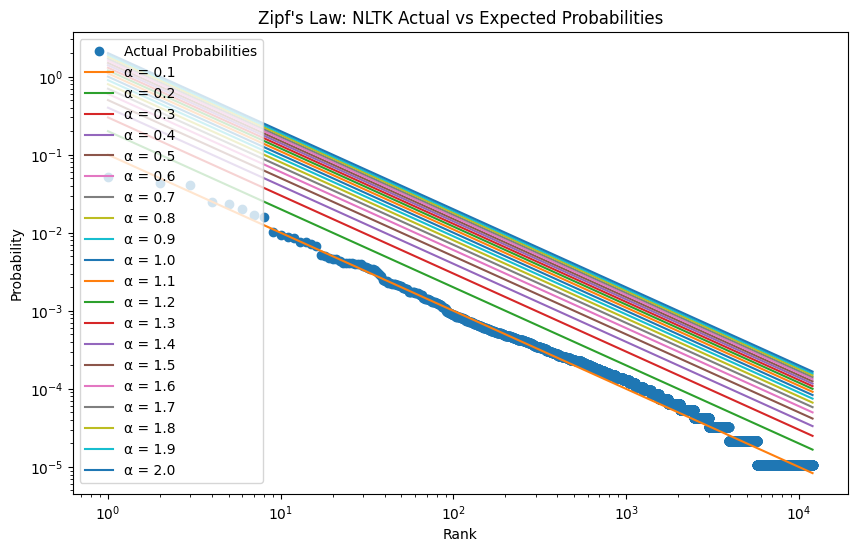

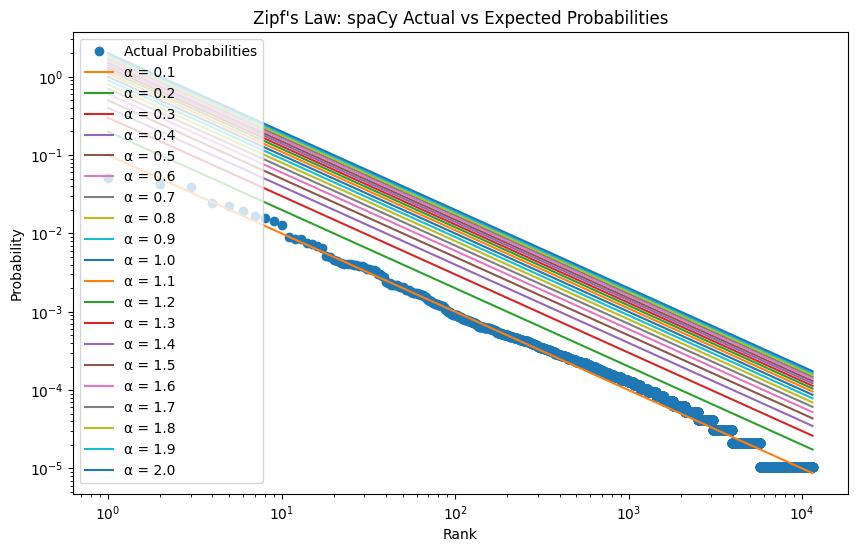

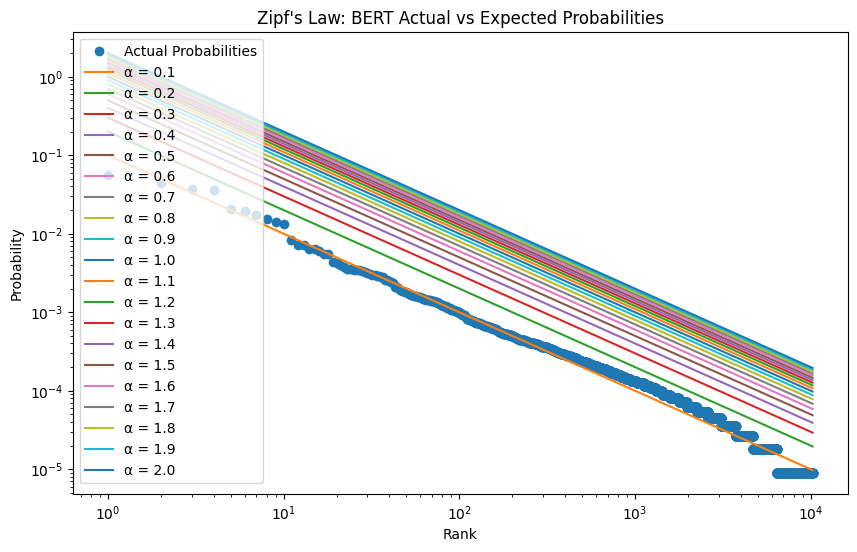

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of alpha values to test.
alpha_values = np.arange(0.1, 2.1, 0.1)

# Function to plot Zipf's distribution for different alpha values.
def plot_zipf(probs, alpha_values, model_name):
    # Sort the probabilities in descending order and determine the ranks.
    sorted_probs = np.array(sorted(probs.values(), reverse=True))
    ranks = np.arange(1, len(sorted_probs) + 1)

    # Plot the actual probabilities.
    plt.figure(figsize=(10, 6))
    plt.plot(ranks, sorted_probs, 'o', label='Actual Probabilities')

    # Plot expected probabilities for each alpha value.
    for alpha in alpha_values:
        expected_probs = alpha / ranks
        plt.plot(ranks, expected_probs, label=f'α = {alpha:.1f}')

    # Set plot to log scale for both axes to visualize Zipf's law.
    plt.xscale('log')
    plt.yscale('log')
    plt.title(f'Zipf\'s Law: {model_name} Actual vs Expected Probabilities')
    plt.xlabel('Rank')
    plt.ylabel('Probability')
    plt.legend()
    plt.show()

# Generate plots for NLTK, spaCy, and BERT probabilities.
plot_zipf(nltk_probs, alpha_values, 'NLTK')
plot_zipf(spacy_probs, alpha_values, 'spaCy')
plot_zipf(bert_probs, alpha_values, 'BERT')


## Calculate the zipf's distribution according to optimal value of A in logarithmic scales

 The diagram's below, illustrate the distribution of token frequencies on a log-log scale, as well as their adherence to the Zipfian distribution.

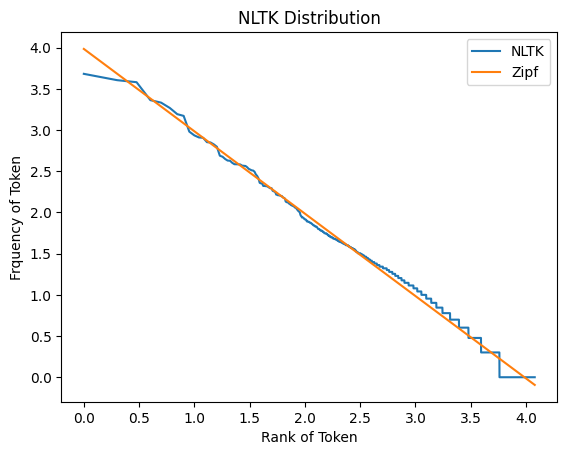

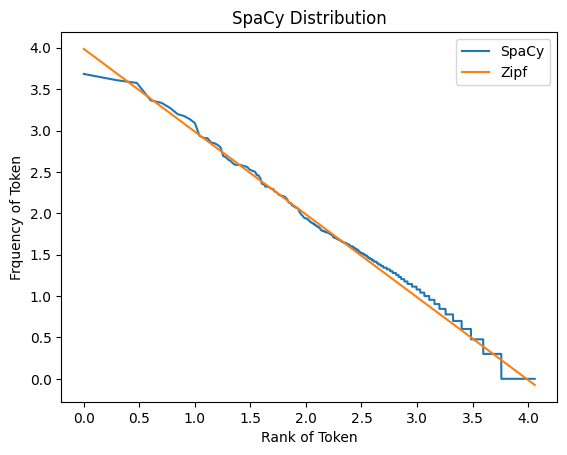

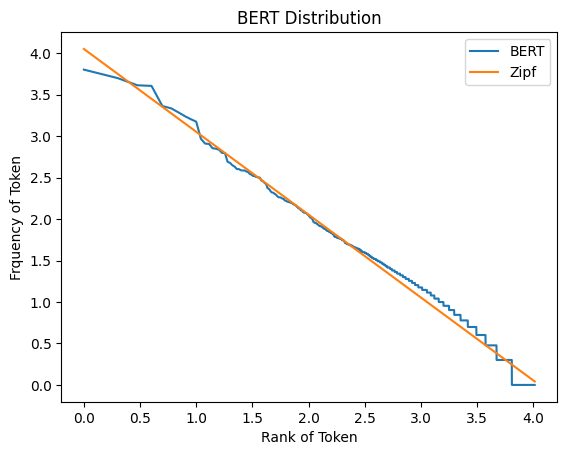

In [31]:
x_nltk, y_nltk = zip(*enumerate([frequency   for token, frequency in token_counts.most_common()], start=1))
x_spacy, y_spacy = zip(*enumerate([frequency for token, frequency in token_counts2.most_common()], start=1))
x_bert, y_bert = zip(*enumerate([frequency   for token, frequency in token_counts3.most_common()], start=1))

zipf_nltk  = [A["nltk"] *  total_tokens/rate  for rate in x_nltk]
zipf_spacy = [A["spacy"]* total_tokens2/rate  for rate in x_spacy]
zipf_bert  = [A["bert"] *  total_tokens3/rate for rate in x_bert]

plt.plot(np.log10(x_nltk), np.log10(y_nltk), label="NLTK")
plt.plot(np.log10(x_nltk), np.log10(zipf_nltk), label="Zipf")
plt.title("NLTK Distribution")
plt.xlabel("Rank of Token")
plt.ylabel("Frquency of Token")
plt.legend()
plt.show()

plt.plot(np.log10(x_spacy), np.log10(y_spacy), label="SpaCy")
plt.plot(np.log10(x_spacy), np.log10(zipf_spacy), label="Zipf")
plt.title("SpaCy Distribution")
plt.xlabel("Rank of Token")
plt.ylabel("Frquency of Token")
plt.legend()
plt.show()

plt.plot(np.log10(x_bert), np.log10(y_bert), label="BERT")
plt.plot(np.log10(x_bert), np.log10(zipf_bert), label="Zipf")
plt.title("BERT Distribution")
plt.xlabel("Rank of Token")
plt.ylabel("Frquency of Token")
plt.legend()
plt.show()


### Prompts I used at Chat GPT-4
### -find nltk,spacy and bert probabilities from token_counts
### -Generate plots for NLTK, spaCy, and BERT probabilities. Define a range of alpha values to test. Create a function to plot Zipf's distribution for different alpha values. Use probability= alpha/rank

---------------------------------

### I have commented out some code that was generated by chat gpt-4 but it was not needed
### The diagrams are essentially the same as previously, indicating the robustness and effectiveness of chat gpt-4

### It can be observed that NLTK's and SpaCy's diagram looks more similar while
### BERT's diagram is a bit different. Some probabilites(dots) of its distribution are placed elsewere in the plot

NLTK Probabilities: {'Pierre': 1.0691756655618519e-05, 'Vinken': 2.1383513311237037e-05, ',': 0.05156634235004811, '61': 5.345878327809259e-05, 'years': 0.0012295520153961295, 'old': 0.0002566021597348444, 'will': 0.0029723083502619482, 'join': 4.2767026622474074e-05, 'the': 0.043205388645354434, 'board': 0.00032075269966855556, 'as': 0.004094942799101892, 'a': 0.01985459210948359, 'nonexecutive': 5.345878327809259e-05, 'director': 0.0003421362129797926, 'Nov.': 0.00024591040307922593, '29': 5.345878327809259e-05, '.': 0.04083181866780712, 'Mr.': 0.0039666417192344705, 'is': 0.007174168715920025, 'chairman': 0.0004811290495028333, 'of': 0.024719341387790014, 'Elsevier': 1.0691756655618519e-05, 'N.V.': 4.2767026622474074e-05, 'Dutch': 3.207526996685555e-05, 'publishing': 0.00013899283652304072, 'group': 0.0004597455361915963, 'Rudolph': 3.207526996685555e-05, 'Agnew': 1.0691756655618519e-05, '55': 0.00010691756655618518, 'and': 0.015920025660215973, 'former': 0.00020314337645675184, 'Co

<Figure size 1200x800 with 0 Axes>

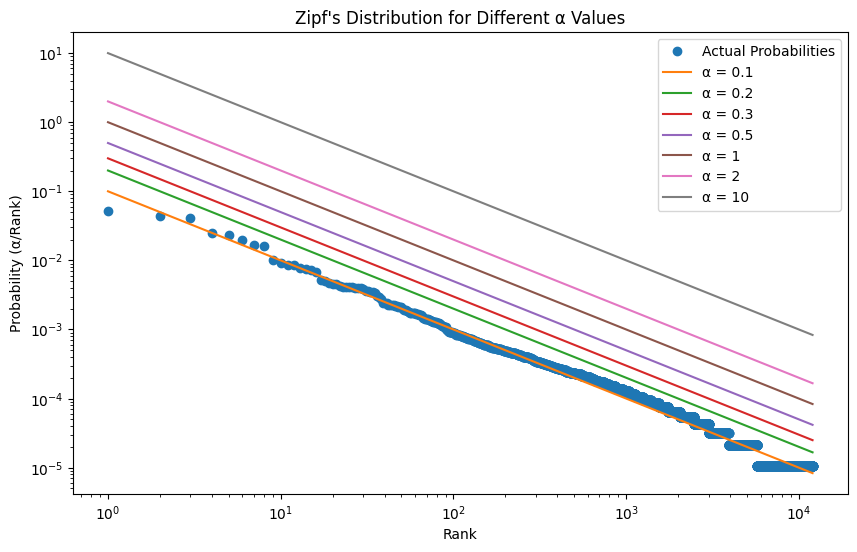

<Figure size 1200x800 with 0 Axes>

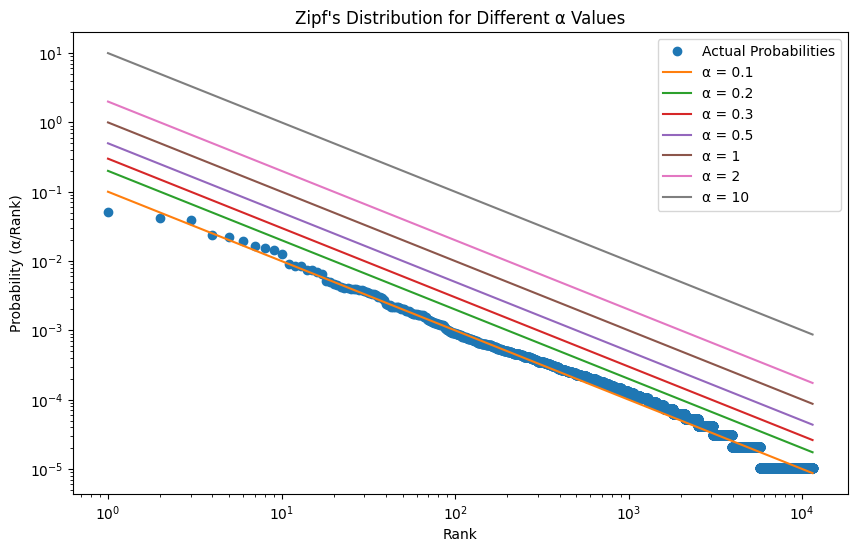

<Figure size 1200x800 with 0 Axes>

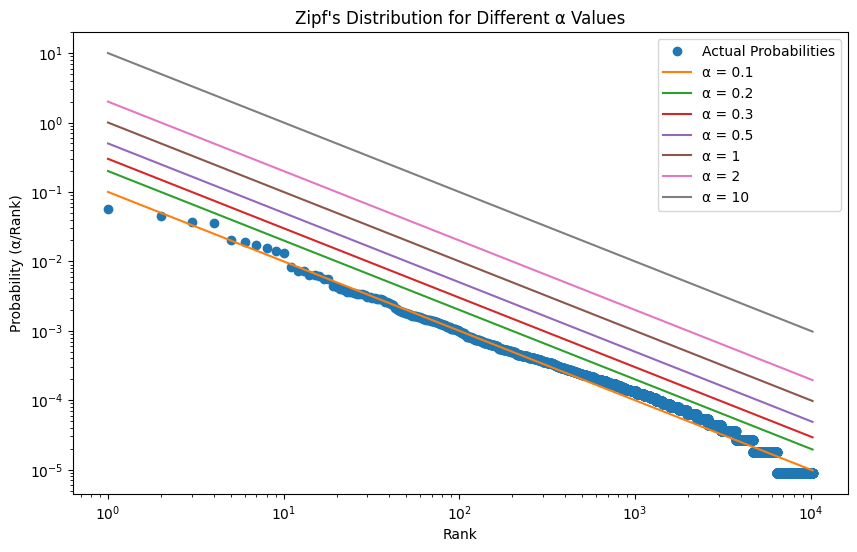

In [32]:
import numpy as np

def normalize_counts(token_counts):
    total_count = sum(token_counts.values())
    probabilities = {token: count / total_count for token, count in token_counts.items()}
    return probabilities

# Note: Commented out this from chat gpt because it was not needed

# # Example token counts for NLTK, spaCy, and BERT
# nltk_token_counts = {'apple': 100, 'banana': 50, 'orange': 30}
# spacy_token_counts = {'apple': 80, 'banana': 60, 'orange': 40}
# bert_token_counts = {'apple': 120, 'banana': 70, 'orange': 50}


# Added code, I passed token counts to the function

# Normalize counts to probabilities
nltk_probs = normalize_counts(token_counts)
spacy_probs = normalize_counts(token_counts2)
bert_probs = normalize_counts(token_counts3)
##

print("NLTK Probabilities:", nltk_probs)
print("spaCy Probabilities:", spacy_probs)
print("BERT Probabilities:", bert_probs)


def plot_zipfs_distribution(alpha_values, probs , max_rank=100):
    """
    Plots Zipf's distribution for a range of alpha values.

    Parameters:
    - alpha_values: A list of alpha values to plot the distributions for.
    - max_rank: The maximum rank to plot for.
    """
    ranks = np.arange(1, max_rank + 1)  # Ranks from 1 to max_rank
    plt.figure(figsize=(12, 8))

    ### Added code from previous implementation
    # Sort the probabilities in descending order and determine the ranks.
    sorted_probs = np.array(sorted(probs.values(), reverse=True))
    ranks = np.arange(1, len(sorted_probs) + 1)

    # Plot the actual probabilities.
    plt.figure(figsize=(10, 6))
    plt.plot(ranks, sorted_probs, 'o', label='Actual Probabilities')
    ########

    for alpha in alpha_values:
        probabilities = alpha / ranks
        plt.plot(ranks, probabilities, label=f'α = {alpha}')

    plt.title("Zipf's Distribution for Different α Values")
    plt.xlabel('Rank')
    plt.ylabel('Probability (α/Rank)')
    plt.yscale('log')
    plt.xscale('log')
    plt.legend()
    plt.show()

# Define a range of alpha values to test
# Note: Added 0.2 and 0.3 to the test
alpha_values = [0.1, 0.2, 0.3,  0.5, 1, 2, 10]

# Generate plots
plot_zipfs_distribution(alpha_values, nltk_probs)

# Generate plots
plot_zipfs_distribution(alpha_values, spacy_probs)

# Generate plots
plot_zipfs_distribution(alpha_values, bert_probs)

# Chat gpt-4 prompts

### -Generate Python code to calculate the expected frequencies of tokens in a text corpus according to Zipf's law using NLTK. Assume you have the total number of tokens in the corpus stored in a variable named total_tokens. The frequency of the most common token is stored in a dictionary A with the key 'nltk'. You also have a list of ranks for each token in the corpus stored in x_nltk. Use list comprehension to compute the expected frequencies for each rank according to Zipf's law, where the expected frequency is the product of the most common token's frequency and the total number of tokens, divided by each token's rank. Store the result in a list named zipf_nltk

### -generate Python code to create two lists, x_nltk and y_nltk, where x_nltk contains the ranks of tokens and y_nltk contains their corresponding frequencies, based on the frequency of occurrence of tokens in a Counter object named token_counts. Assume token_counts is already initialized. Use the most_common() method of the Counter object to get tokens ranked by frequency. Ensure that the enumeration starts from 1.

### -plot x_nltk and y_nltk by casting each one in logarithmic scale

-------------------------------

### Note: the prompts must be used in the order that they are presented!

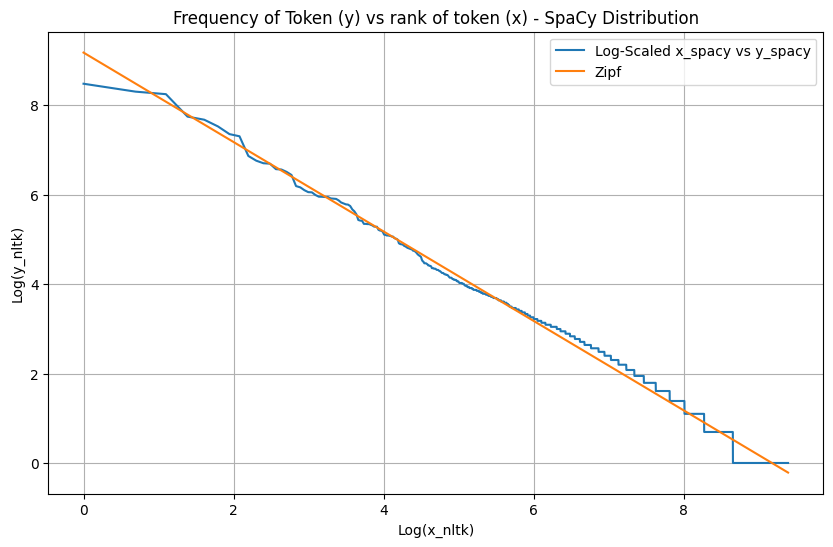

In [33]:
# Assume token_counts is already initialized with token frequencies
# For example: token_counts = Counter({'the': 4, 'and': 3, 'python': 2})

# Use the most_common() method to rank tokens by frequency
most_common_tokens = token_counts.most_common()

# Initialize x_nltk and y_nltk lists
x_nltk = []
y_nltk = []

# Fill the lists with ranks (starting from 1) and their corresponding frequencies
for rank, (token, frequency) in enumerate(most_common_tokens, start=1):
    x_nltk.append(rank)
    y_nltk.append(frequency)

# # Now, x_nltk contains the ranks and y_nltk contains the frequencies of the tokens


# Assuming the variables total_tokens, A, and x_nltk are already defined as described
# Frequency of the most common token
most_common_token_freq = A['nltk']

# Calculate expected frequencies according to Zipf's law
zipf_nltk = [(most_common_token_freq * total_tokens) / rank for rank in x_nltk]


# Casting both x and y in logarithmic scale
plt.figure(figsize=(10, 6))
plt.plot(np.log(x_nltk), np.log(y_nltk), label='Log-Scaled x_spacy vs y_spacy')
## note: added this line based on the previous one
plt.plot(np.log(x_nltk), np.log(zipf_nltk), label="Zipf")
plt.xlabel('Log(x_nltk)')
plt.ylabel('Log(y_nltk)')
# note: changed title
plt.title('Frequency of Token (y) vs rank of token (x) - SpaCy Distribution')
plt.legend()
plt.grid(True)
plt.show()

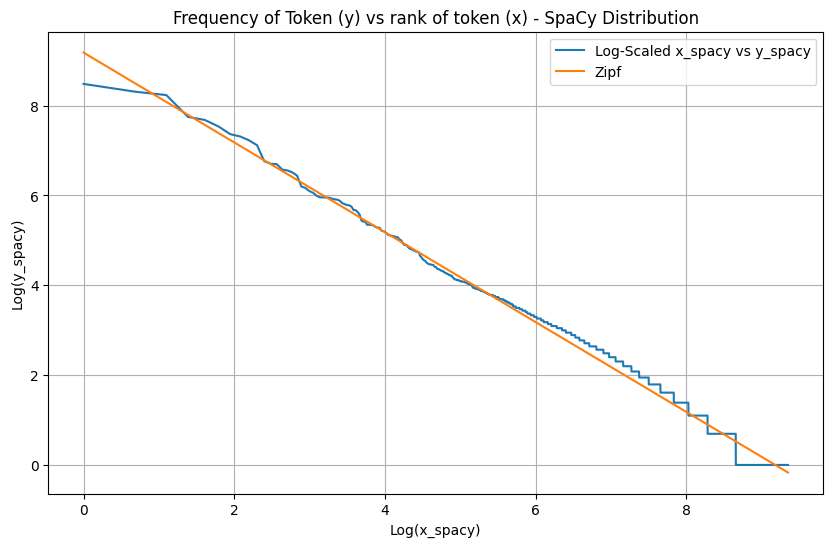

In [34]:
#Note: Replaced nltk's lines with spacy
# Assume token_counts2 is already initialized with token frequencies
# For example: token_counts2 = Counter({'the': 4, 'and': 3, 'python': 2})

# Use the most_common() method to rank tokens by frequency
# Note: Used token_counts2 for SpaCy
most_common_tokens = token_counts2.most_common()

# Initialize x_spacy and y_spacy lists
x_spacy = []
y_spacy = []

# Fill the lists with ranks (starting from 1) and their corresponding frequencies
for rank, (token, frequency) in enumerate(most_common_tokens, start=1):
    x_spacy.append(rank)
    y_spacy.append(frequency)

# # Now, x_spacy contains the ranks and y_spacy contains the frequencies of the tokens


# Assuming the variables total_tokens, A, and x_spacy are already defined as described
# Frequency of the most common token
most_common_token_freq = A['spacy']

# Calculate expected frequencies according to Zipf's law
# Note: Replaced total_tokens (which was for nltk) with total_tokens2 for spacy
zipf_spacy = [(most_common_token_freq * total_tokens2) / rank for rank in x_spacy]


# Casting both x and y in logarithmic scale
plt.figure(figsize=(10, 6))
plt.plot(np.log(x_spacy), np.log(y_spacy), label='Log-Scaled x_spacy vs y_spacy')
## note: added this line based on the previous one
plt.plot(np.log(x_spacy), np.log(zipf_spacy), label="Zipf")
plt.xlabel('Log(x_spacy)')
plt.ylabel('Log(y_spacy)')
# note: changed title
plt.title('Frequency of Token (y) vs rank of token (x) - SpaCy Distribution')
plt.legend()
plt.grid(True)
plt.show()

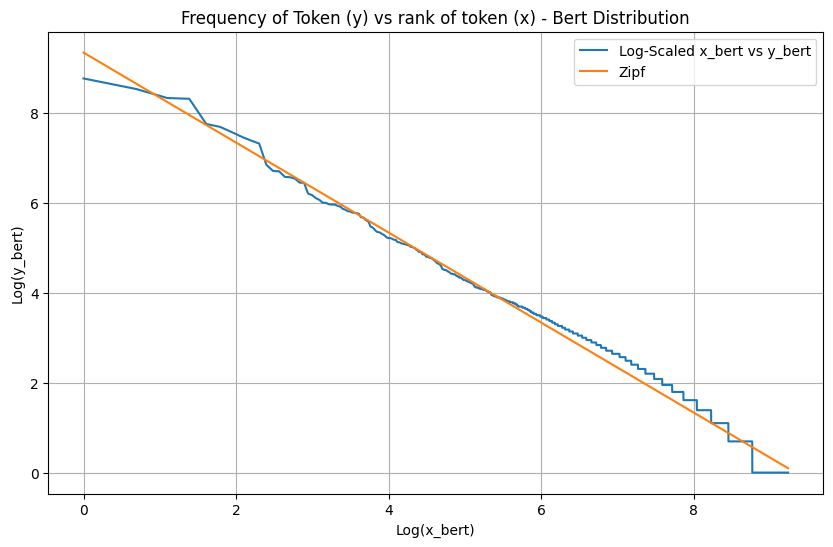

In [35]:
#Note: Replaced nltk's lines with bert
# Assume token_counts3 is already initialized with token frequencies
# For example: token_counts3 = Counter({'the': 4, 'and': 3, 'python': 2})

# Use the most_common() method to rank tokens by frequency
# Note: Used token_counts3 for bert
most_common_tokens = token_counts3.most_common()

# Initialize x_bert and y_bert lists
x_bert = []
y_bert = []

# Fill the lists with ranks (starting from 1) and their corresponding frequencies
for rank, (token, frequency) in enumerate(most_common_tokens, start=1):
    x_bert.append(rank)
    y_bert.append(frequency)

# # Now, x_bert contains the ranks and y_bert contains the frequencies of the tokens


# Assuming the variables total_tokens, A, and x_bert are already defined as described
# Frequency of the most common token
most_common_token_freq = A['bert']

# Calculate expected frequencies according to Zipf's law
# Note: Replaced total_tokens (which was for nltk) with total_tokens3 for bert
zipf_bert = [(most_common_token_freq * total_tokens3) / rank for rank in x_bert]


# Casting both x and y in logarithmic scale
plt.figure(figsize=(10, 6))
plt.plot(np.log(x_bert), np.log(y_bert), label='Log-Scaled x_bert vs y_bert')
## note: added this line based on the previous one
plt.plot(np.log(x_bert), np.log(zipf_bert), label="Zipf")
plt.xlabel('Log(x_bert)')
plt.ylabel('Log(y_bert)')
# note: changed title
plt.title('Frequency of Token (y) vs rank of token (x) - Bert Distribution')
plt.legend()
plt.grid(True)
plt.show()